# Python Básico para Computação Numérica 2

Visualizar informações é importantíssimo em Computação Numérica

_Plotar_ uma função é desenhar a mesma em um eixo de coordenadas, normalmente através da escolha de _N_ pontos da função, calculndo seus valores, e desenhando retas (ou curvas) entre eles. Quanto mais pontos usados, mais suave é a curva.

Normalmente o processo de plot involve gerar dois vetores _x_ e _y_, com _x_ contendo o valor no eixo das abcissas, e _y_ o valor no eixo das ordendas.

Ex: _x_ contendo valores linermente espaçados em um intervalo [a,b], e _y_ contendo os valores de $f(x),\forall x$



## Gráficos Básicos

A biblioteca que usaremos para manipulação de gráficos em Python é a MatPlotLib. Usaremos ela não apenas por ser a mais popular e poderosa, mas também por ela ser +- compatível com o Matlab, que vocês tem chance de encontrar por aí. 

In [1]:
#!pip3 install matplotlib --user
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib é pop então tem mais funções e mais helps na internet
é mais ou menos compatível com matlab

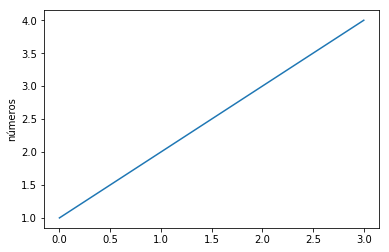

In [2]:
# quando só tem um vetor, ele é assumido como o y e x começa de 0 e vai até len(y)-1
plt.plot([1,2,3,4])
plt.ylabel('números')
plt.show()

De onde veio esse eixo x? Se o plot só recebe um vetor, ele assume que o eixo X são números monoespaçados iniciando de 0

No geral, num plot se espera pelo menos dois vetores _x_ e _y_, ou ainda mais.

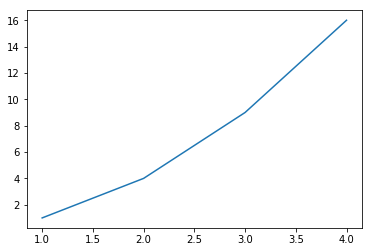

In [3]:
# primeiro é o x e o segundo é o y
# quanto mais pontos, mais suave fica a curva
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

Um terceiro argumento possível para o plot é uma string que define qual o estilo da linha plotada. O padrão é 'b-', o que é uma linha azul. Por exemplo, para círculos vermelhos, use:

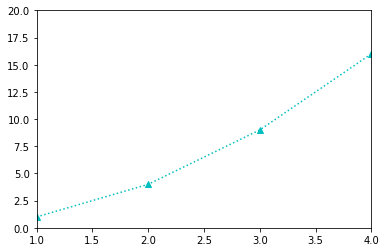

In [4]:
# terceiro parâmetro é o estilo da linha
# r (red) + o (bolinha) + -- (tracejado)
# '<cor><marcador><linha>'
plt.plot([1,2,3,4], [1,4,9,16], 'c^:')
# intervalo de desenho do eixo x e y
# x: [1,4] e y:[0,20]
plt.axis([1, 4, 0, 20])
plt.show()

In [5]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu

O que o comando `plt.axis()` faz?

Uma vantagem do Matplotlib é que ele funciona com o Numpy (incluindo as vantagens da vetorização). 

Ex: Vamos plotar diversas operações sobre o mesmo conjunto de dados (`t`) em uma única imagem, usando plot com diversos parâmetros:

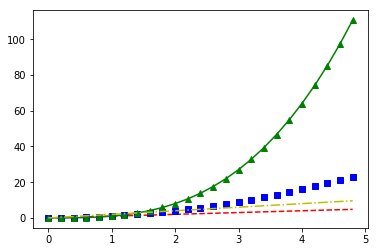

In [5]:
import numpy as np
t = np.arange(0., 5., 0.2)

# a cada 3 parâmetros é uma função
# x, x² e x³
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^-')
# uma quarta função 2x
plt.plot(t,t*2,'y-.')
plt.show()

Se você quiser plotar um único ponto, você pode usar no lugar das listas com pontos apenas um:

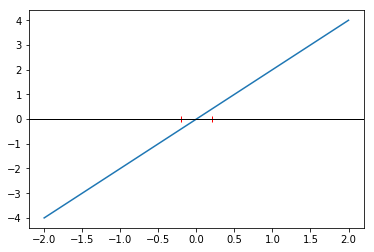

In [6]:
x = np.array([-2,-1,0,1,2])
y = x*2

# a partir do segundo parâmetro, passa apenas um ponto e marca com uma linha, no caso 2
plt.plot(x,y,-0.2,0,'r|',0.2,0,'r|')
# plota constante y = 0
plt.axhline(0, color='black',linewidth=1)


### Plotando funções

Para plotar funções é bem simples:

- Primeiro você define a função 
- Depois os pontos X
- Em seguida você plota X, f(X)

Exemplo:

Plotar \begin{equation}f(x)=\frac{e^{x}-1}{x}\end{equation} para o intervalo $[1,7]$

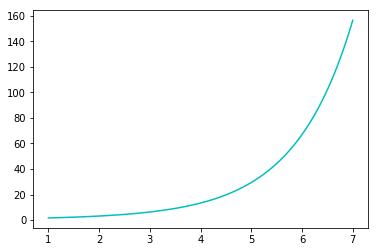

In [7]:
def f(x):
    return (np.e**x-1)/x
x = np.linspace(1,7,100)
plt.plot(x,f(x),'c')

### Exercícios

Plote 

\begin{equation}h(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}\end{equation}

Para o intervalo [-4,4] com 41 pontos

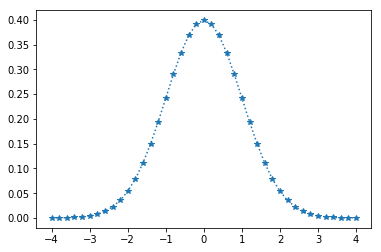

In [13]:
def g(x):
    return np.e**(-x**2/2)/np.sqrt(2*np.pi)
x = np.linspace(-4,4,41)
plt.plot(x,g(x),'*:')

### Mudando propriedades de linhas

Linhas em gráficos tem diversos atributos modificáveis (verifique matplotlib.lines.Line2D com o help para mais detalhes). Como alterar? tem três formas:

- Keywords no plot:

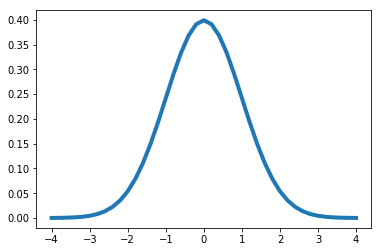

In [16]:
# antialiased = True elimina o cerrilhado da linha, deixa ela mais clean
plt.plot(x,g(x),linewidth=4.0,antialiased=True)

- Metodos Set: a função plot retorna uma lista de objetos referente a cada uma das linhas criadas, e você pode usar funções dele pra alterar valores

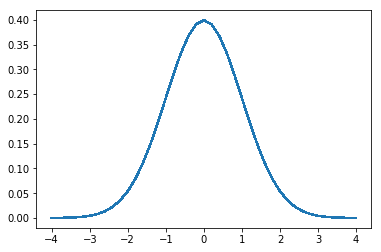

In [17]:
# plot retorna ,uita coisa, então só o primeiro é importante, que é a linha
linha, = plt.plot(x,g(x),'-')
# é bom pq vc pode usar linha.<tab> para ver as coisas que podem ser feitas na linha
linha.set_antialiased(False)

- Função setp(), que pode alterar várias propriedades ao mesmo tempo:

[None, None, None]

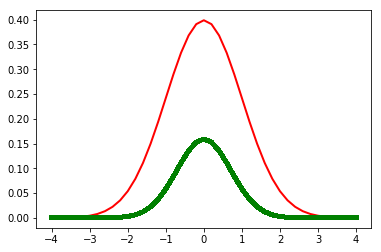

In [19]:
# set propriedade
y = g(x)
linhas = plt.plot(x,y,x,y**2)
# age como se estivesse criando
plt.setp(linhas[0],color='r',linewidth=2.0)
plt.setp(linhas[1],color='g',linewidth=4.0,aa=False)

Lista de possíveis atributos:

In [48]:
# todos os atributos de linhas
plt.setp(linha)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  antialiased or aa: bool 
  clip_box: a `.Bbox` instance 
  clip_on: bool 
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a `.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: object 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]
  linewidth or lw: float value in points 
  marker: :mod:`A valid 

## Múltiplas imagens e eixos

Podemos trabalhar com múltiplas figuras em um único plot, usando o conceito de subplot:

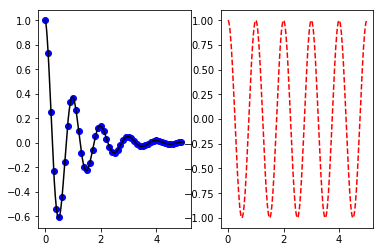

In [20]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# quantas figuras tem no plot
plt.figure(2)
# cria o grid que comportará os subplots
# linhas, colunas, atual (1)
plt.subplot(1,2,1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

#linha, colunas, fig 2
plt.subplot(1,2,2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


O comando `subplot()` recebe como parâmetro `nlinhas,ncolunas,indice`, onde `indice` é um número entre 1 e `nlinhas*ncolunas` (subplot pode ser feito tmbém sem as vírgulas como nos exemplos)

/home/icomp/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Titulo do primeiro grafico')

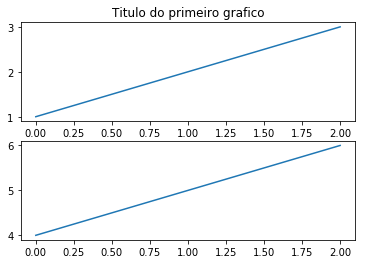

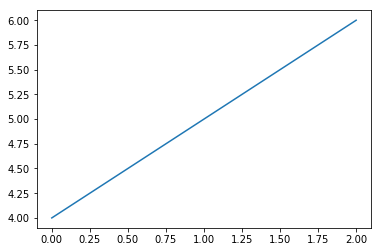

In [57]:
# cria o primeiro gigure e mexe nele
plt.figure(1)                
plt.subplot(211)             
plt.plot([1, 2, 3])
plt.subplot(212)             
plt.plot([4, 5, 6])

# cria o segundo figure e mexe nele
plt.figure(2)  # Cria uma nova figura              
plt.plot([4, 5, 6])          

# figure 1 tá criada, só volta a mexer nela
plt.figure(1)  # Volta para a primeira figura
plt.subplot(211)             
plt.title('Titulo do primeiro grafico') 

### Exercício:

Plote as funções \begin{equation}f_{1}(t)=t^{2}e^{-t^{2}}\end{equation} e \begin{equation}f_{2}(t)=t^{4}e^{-t^{2}}\end{equation} em uma mesma imagem:

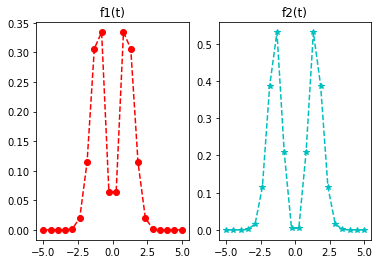

In [63]:
def f1(t):
    return t**2*np.exp(-t**2)

def f2(t):
    return t**4*np.exp(-t**2)

x = np.linspace(-5,5,20)
plt.figure(1)
plt.subplot(1,2,1)
plt.title("f1(t)")
plt.plot(x,f1(x),'ro--')

plt.subplot(122)
plt.plot(x,f2(x),'c*--')
plt.title("f2(t)")
plt.show()

Você pode limpar configurações na figura atual com `clf()`. 

## Adicionando texto ao gráfico


A função `text()` pode ser usada para adicionar um texto a qualquer parte de uma imagem. `xlabel()`,`ylabel()` e `title()` podem ser usados para adicionar legendas à imagem

/home/icomp/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


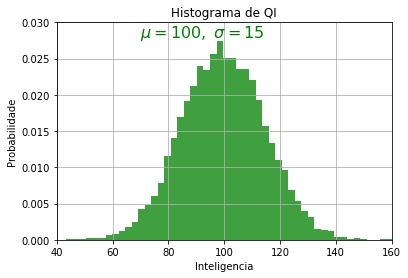

In [82]:
np.random.seed(19680801)

mu, sigma = 100, 15
val = mu + sigma * np.random.randn(10000)

# Histograma eh outro tipo de grafico
n, bins, patches = plt.hist(val, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Inteligencia')
plt.ylabel('Probabilidade')
plt.title('Histograma de QI')
# coordenada x e y de onde vai colocar do ponto inferior esquerdo
# $$ notação latex para funções
plt.text(70, .028, r'$\mu=100,\ \sigma=15$',color='g',fontsize=16)
plt.axis([40, 160, 0, 0.03])
# desenha um grid atrás da imagem
plt.grid(True)
plt.show()

Todas as funções de texto retornam um objeto que você pode alterar as propriedades, da mesma forma que as linhas:

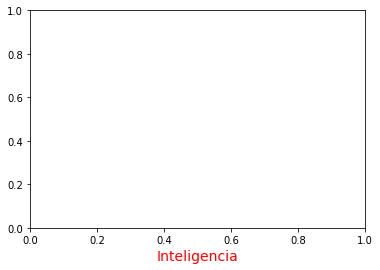

In [66]:
t = plt.xlabel('Inteligencia', fontsize=14, color='red')

A função `legend()` adiciona uma caixa de legendas para identificar as curvas no plot:

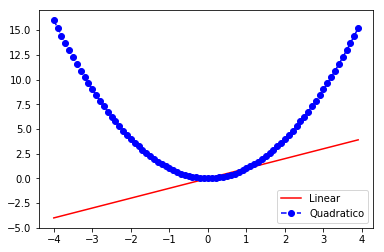

In [83]:
x = y = np.arange(-4,4,0.1)
plt.plot(x,y,"r-",x,y**2,"bo--")
# em ordem, usado para cada curva adicionada ao plot
plt.legend(['Linear','Quadratico'])

Muitas vezes você quer adicionar um texto a uma parte de um gráfico com algum tipo de indicação. Para isto você pode usar o comando `annotate()`. Ele adiciona texto a um ponto especifico do gráfico. Ele tem duas coordenadas importantes: O `xy` do ponto anotado e o `xytext`, que é a posição onde o texto estará.

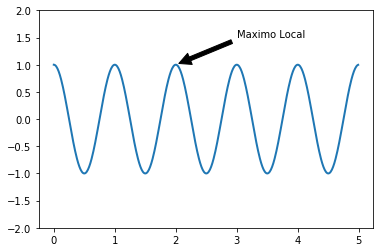

In [84]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

# cria uma seta com label para um ponto
# xy são as coordenadas de para onde a seta aponta
# xytext é o canto inferior esquerdo do texto, onde a seta vai terminar
# arrowsprops - propriedades da seta
plt.annotate('Maximo Local', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

# diz o mínimo e máximo do grafico para manter o texto dentro dele
plt.ylim(-2,2)
plt.show()

Text(1.9,1,'b')

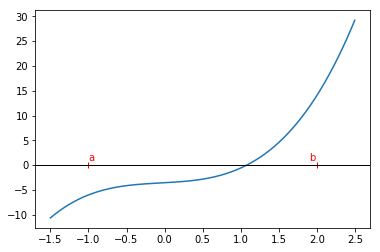

In [85]:
import numpy as np
import matplotlib.pyplot as plt

x2 = np.linspace(-1.5,2.5,1000)
y2 = 2*x2**3-np.cos(x2+1)-3

plt.plot(x2,y2,-1,0,'r|',2,0,'r|')
plt.axhline(0, color='black',linewidth=1)
# sem seta e marcando o ponto
plt.annotate('a',xy=(-1,0),xytext=(-1,1),color="red")
plt.annotate('b',xy=(2,0),xytext=(1.9,1),color="red")

## Eixos não lineares

Muitas vezes, quando temos dados em escala maiores, é normal mostrar os dados em escalas logaritimas ou logit. No matplotlib isso é tão simples quanto `xscale('log')`

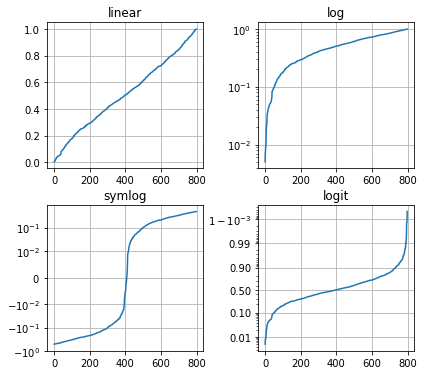

In [70]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
# usa scala logaritmica para os valores ficarem em um intervalo [0,1] e os muito diferentes não atrpalhem a visu.

np.random.seed(19680801)

y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))


plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
# define qual log que voce quer que scale
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.gca().yaxis.set_minor_formatter(NullFormatter())

plt.subplots_adjust(top=1.22, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

## Outros embelezamentos

Vamos tentar agora visualizar outros pequenos detalhes que podemos modificar no gráfico para ele ficar mais interessante. Vamos pegar um plot simples de seno e cosseno:

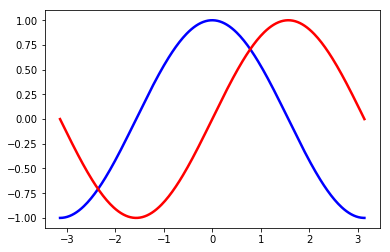

In [21]:
# endpoint é intervalo fechado
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.show()

Se achamos que a figura está muito apertada para os dados, podemos alterar os limites do gráfico. Vamos também adicionar uma legenda ao gráfico:

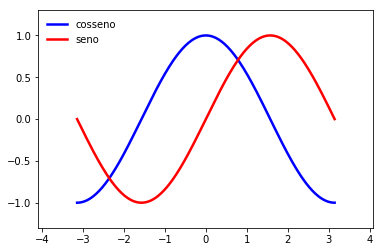

In [25]:
# limites das retas x e y para aumentar o espaço do gráfico (zoom)
# multiplicar por 1.t é aumentar t%
plt.xlim(X.min()*1.3, X.max()*1.3)
plt.ylim(C.min()*1.3, C.max()*1.3)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

# coloca a legenda no canto superior à esquerda
plt.legend(loc='upper left', frameon=False)

plt.show()

Os pontos nos eixos não estão ideais. Afinal, estamos falando de ângulos, então o ideal seria valores baseados em $\pi$. Para mudar os pontos nos eixos (chamados _ticks_), faça:

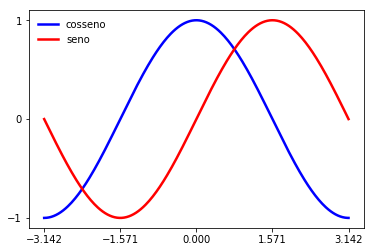

In [26]:
# tick é a maração dos pontos nas retas (vetor)
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left', frameon=False)

plt.show()

Vish, os pontos em pi tão corretos, mas os valores estão palha. Não seria legal se os valores fossem frações de $\pi$?

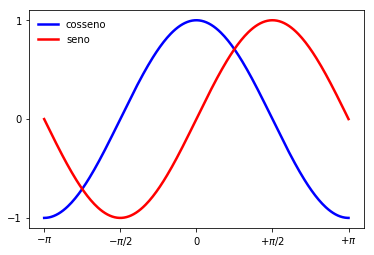

In [27]:
# primeiro passa a lista de pontos e o segundo é uma lista de nomes de pontos
# $ transforma na mesma notação de fórmula do LaTeX
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left', frameon=False)

plt.show()

O gráfico está dentro de uma caixa. Não seria melhor que eles estivecem como uma cruz na origem?

Spines são as linhas aonde os _ticks_ ficam, e elas podem ser movidas para qualquer posição.

Vamos eliminar as linhas de cima e da direita, e colocar a da esquerda e a de baixo centralizadas no gráfico:

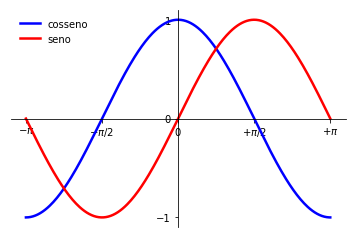

In [28]:
ax = plt.gca()
# spines são as espinhas x e y, que são as retas
# o da direita e de cima sem cor
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# muda a posição dos ticks em relação a linha
ax.xaxis.set_ticks_position('bottom')
# muda a posição do x para o meio
ax.spines['bottom'].set_position(('data',0))
# muda a posição dos ticks em relação a linha
ax.yaxis.set_ticks_position('left')
# puxa o y para o meio
ax.spines['left'].set_position(('data',0))

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left', frameon=False)

plt.show()

E se a gente quiser marcar pontos específicos no gráfico e destacar? Por exemplo, gostariamos de ver no gráfico onde fica o ponto $2\pi/3$ nas duas funções. Vamos marcar as posições com um ponto, e vamos também fazer uma reta pontilhada até eles:

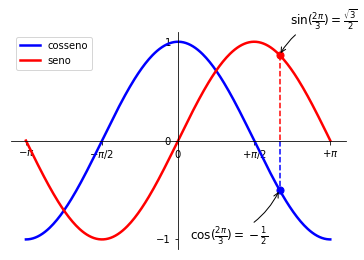

In [29]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left')


t = 2*np.pi/3
#Plota a linha
# plota linha vermelha de y = 0 a y = sen(3pi/2) para x = 3pi/2
plt.plot([t,t],[np.sin(t),0], color ='r', linewidth=1.5, linestyle="--")
# plota linha vermelha de y = 0 a y = cos(3pi/2) para x = 3pi/2
plt.plot([t,t],[0,np.cos(t)], color ='b', linewidth=1.5, linestyle="--")


#plota os pontos usando a funcao scatter
# faz a bolinha
plt.scatter([t,],[np.cos(t),], 50, color ='blue')
plt.scatter([t,],[np.sin(t),], 50, color ='red')

# texto, ponto do valor, ponto do texto etc.
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),
             xytext=(+10, +30), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),
             xytext=(-90, -50), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.show()

Agora com esse monte de coisas tá meio ruim de ler os _ticks_ né? Tem como aumentar a fonte dele?

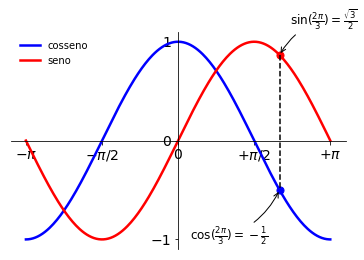

In [34]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")

plt.legend(loc='upper left', frameon=False)


t = 2*np.pi/3
#Plota a linha
plt.plot([t,t],[np.sin(t),np.cos(t)], color ='black', linewidth=1.5, linestyle="--")

#plota os pontos usando a funcao scatter
plt.scatter([t,],[np.cos(t),], 50, color ='blue')
plt.scatter([t,],[np.sin(t),], 50, color ='red')


plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),
             xytext=(+10, +30), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),
             xytext=(-90, -50), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

#Altera os ticks
# aumenta ponto por ponto de x e y
# pode ser só do x, só do y, só a parte positiva/negativa etc.
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(14)


plt.show()
# gráficos assim, se gerar em .eps eles crescem junto sem perder definição com zoom

Legal né?

### Agora vocês não tem mais desculpa para fazer gráficos feios!